In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib_3 as mc
from importlib import reload
reload(mc)

<module 'epri_mc_lib_3' from 'C:\\Users\\Saad J\\Desktop\\epri\\myepri\\Task3\\NB\\epri_mc_lib_3.py'>

In [113]:
df = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/Electric_RP.csv'),
                index_col=0)
df

,ID,ACEE_30_Avg_38,ACEE_500_Avg_38,Avg_EFC,Avg_RP,ACPD_Avg_38,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
0,41C,-0.249983,-2.664717,97.42400,190.979294,3.726051,-0.137640,-2.866030,4.804749
1,43C,-0.396353,-2.390293,95.83600,184.930215,3.064434,-0.462040,-2.254125,3.869428
2,44C,-0.499607,-2.747297,96.43600,187.204261,2.720381,-0.596385,-2.788500,3.370729
3,45C,-0.582543,-3.051327,96.91000,189.010633,3.064732,-0.645710,-3.202220,4.186639
4,7C,-1.079600,-1.504297,94.28700,179.123964,2.957302,-1.135960,-1.718115,3.438451
5,13C,-0.381817,-1.541673,91.83700,170.130491,3.078895,-0.660875,-2.167395,3.725514
6,8C,-0.878553,-1.530483,91.76400,169.866095,2.787400,-0.951840,-1.502545,3.529319
7,35C,-0.813900,-1.298970,92.16500,171.321012,2.647839,-0.867430,-1.350065,3.050650
8,24C,-0.627700,-1.985753,93.02300,174.454983,3.041253,-0.816755,-1.836935,4.259982
9,34C,-0.885640,-1.377487,91.81100,170.036299,2.811182,-1.014340,-1.521755,3.579960


In [114]:
df.columns.tolist()

['ID',
 'ACEE_30_Avg_38',
 'ACEE_500_Avg_38',
 'Avg_EFC',
 'Avg_RP',
 'ACPD_Avg_38',
 'ACEE_30_Avg_58',
 'ACEE_500_Avg_58',
 'ACPD_Avg_58']

In [115]:
ACEE_ACPD=df[['ACEE_30_Avg_38',
 'ACEE_500_Avg_38',
 'ACPD_Avg_38',
 'ACEE_30_Avg_58',
 'ACEE_500_Avg_58',
 'ACPD_Avg_58']]


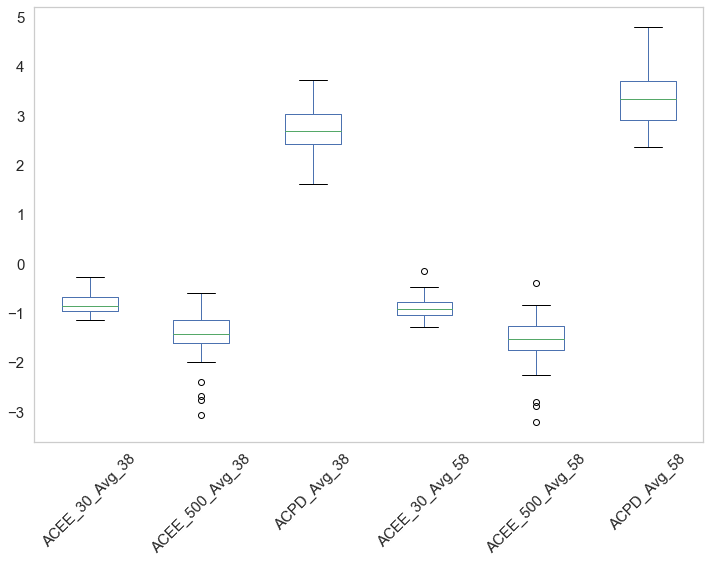

In [116]:
boxplot = ACEE_ACPD.boxplot(grid=False, rot=45, fontsize=15, figsize=(12,8))

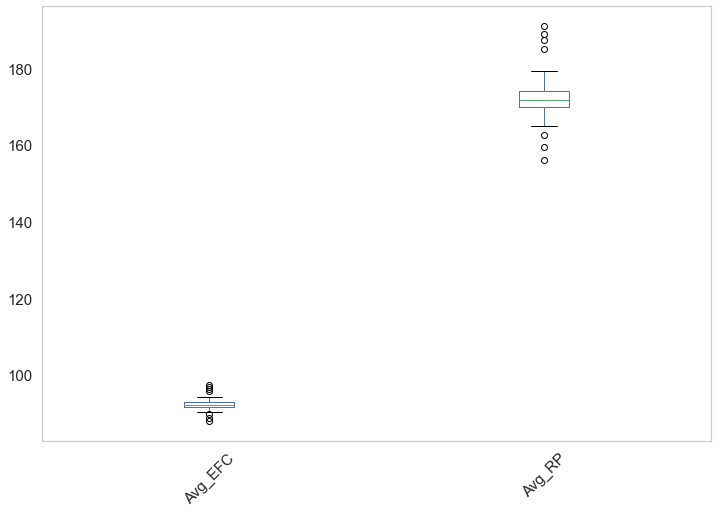

In [117]:
boxplot = df[['Avg_EFC', 'Avg_RP']].boxplot(grid=False, rot=45, fontsize=15, figsize=(12,8))

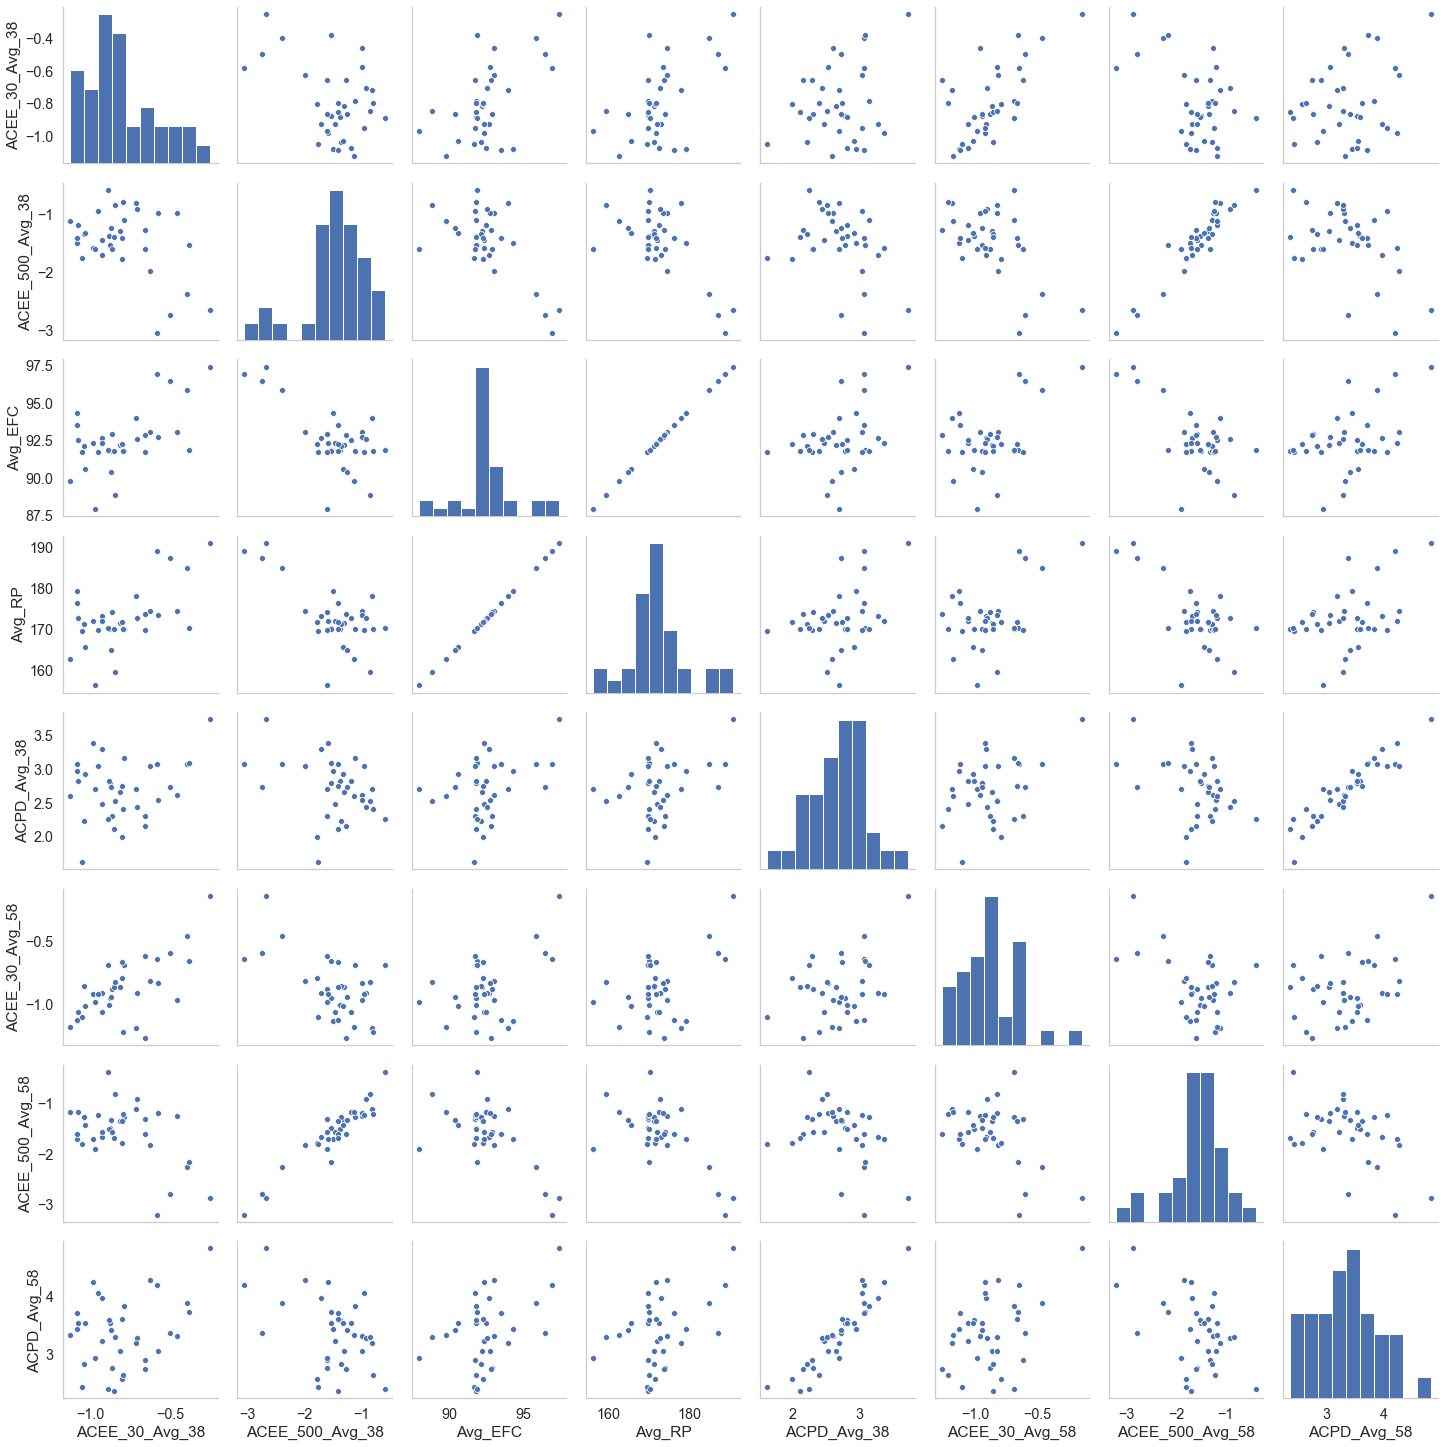

In [118]:
sns.pairplot(df)

In [119]:
def plot_corr(data, figsize=(12,10)):
    '''
    Plot correlation 
    Args:
    - data: pd dataframe
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(corr, mask=mask, square=True, cmap='RdBu_r', center=0, annot=True,
                        annot_kws={'fontsize':15})                

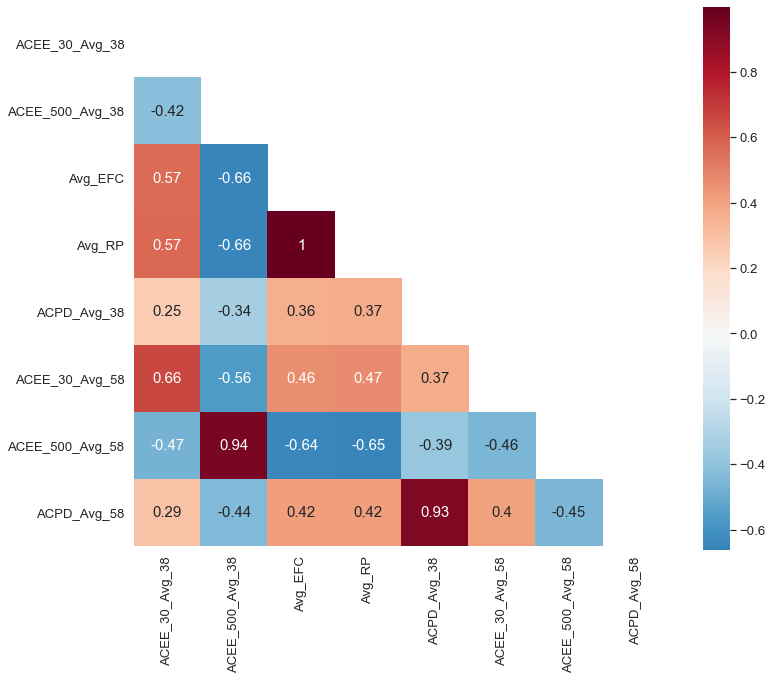

In [120]:
plot_corr(df)